# Processing of autocorrelation function

## Initial processing and calculating the ACF - no need to look at this unless you're interested in the code

In [1]:
import slice_tools
import data_tools
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from scipy.signal import correlate2d
from sklearn import cluster
from datetime import datetime


In [2]:
filePath = '/Users/s1101153/Dropbox/Emily/'
dat = slice_tools.read_files(filePath, dropNans=True)
dat = data_tools.norm_data(dat)
print(dat.describe())


slices T6M_29_1_slice5.pkl                                            \
vars                     r         theta     val_green       val_red   
count         24400.000000  24400.000000  24400.000000  24400.000000   
mean            121.500000      0.259181      0.281606      0.197799   
std              70.437585      0.151145      0.163161      0.170295   
min               0.000000      0.000000      0.000000      0.000000   
25%              60.750000      0.129591      0.144068      0.089947   
50%             121.500000      0.259181      0.271186      0.116402   
75%             182.250000      0.388772      0.389831      0.243386   
max             243.000000      0.518363      1.000000      1.000000   

slices T3M_7_1_slice9.pkl                                            \
vars                    r         theta     val_green       val_red   
count        24400.000000  24400.000000  24400.000000  24400.000000   
mean           121.500000      0.259181      0.094812      0.48724

In [3]:
sliceNames = dat.columns
n_slice = int(len(sliceNames)/4)
ACF = pd.DataFrame()
i=1
index_g = sliceNames[i*4 + 2]
index_r = sliceNames[i*4 + 3]
name = index_g[0]
slice_df = dat.loc[:,name]
num_r = int(len(slice_df)/100)
im_g = np.zeros((num_r, 100))
im_r = np.zeros((num_r, 100))
r, t = 0, 0
    
for j in range(len(slice_df)):
    im_g[r, t] = slice_df['val_green'][j]
    im_r[r, t] = slice_df['val_red'][j]
    if t==99:
        t=0
        r=r+1
    else:
        t=t+1
ac3_r = correlate2d(im_r, im_r)
ac3_g = correlate2d(im_g, im_g)


# Plots of image and autocorrelation

### Red channel image

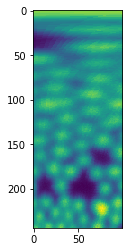

In [4]:
pl.imshow(im_r)

### Red channel autocorrelation

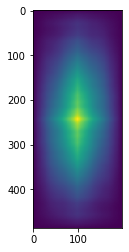

In [5]:
pl.imshow(ac3_r)

### Green channel image

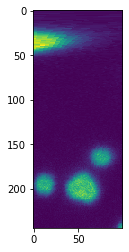

In [6]:
pl.imshow(im_g)

### Green channel autocorrelation

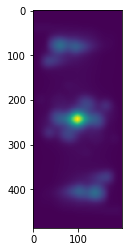

In [7]:
pl.imshow(ac3_g)

# ACF processing options

## Option 1: average so only x-axis remains

### Red channel

In [8]:
def x_average(data):
    y, x = np.indices((data.shape))
    tbin = np.bincount(x.ravel(), data.ravel())
    nx = np.bincount(x.ravel())
    xav = tbin/nx
    return xav

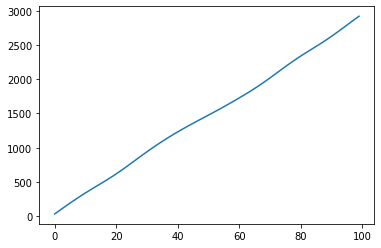

In [9]:
pl.plot(x_average(ac3_r)[:100])

### Green channel

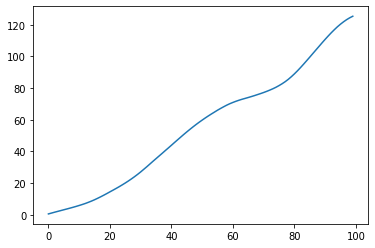

In [10]:
pl.plot(x_average(ac3_g)[:100])

### Thoughts:
This option doesn't really highlight much of the data, I mainly just included it for completeness

## Option 2: average so only y-axis remains

### Red channel

In [11]:
def y_average(data):
    y, x = np.indices((data.shape))
    tbin = np.bincount(y.ravel(), data.ravel())
    ny = np.bincount(y.ravel())
    yav = tbin/ny
    return yav

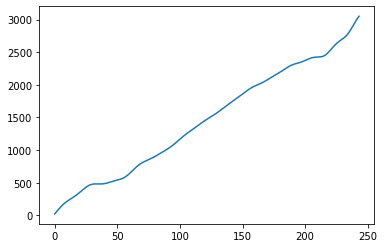

In [12]:
pl.plot(y_average(ac3_r)[:244])

### Green channel

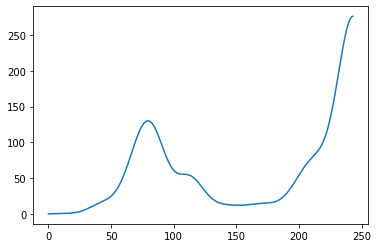

In [13]:
pl.plot(y_average(ac3_g)[:244])

### Thoughts:
This option seems to capture the main features of the autocorrelation, but perhaps is averaging over too much?

## Option 3: Take a single-pixel slice from the central line in the image

### Red channel:

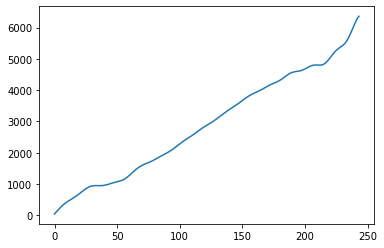

In [14]:
pl.plot(ac3_r[:244,100])

### Green channel:

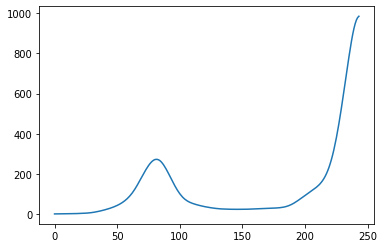

In [15]:
pl.plot(ac3_g[:244,100])

### Thoughts: 
This is actually closer to option 2 than I expected from looking at the raw plots. Option 2 seems to pick up more features though I think.

## Option 4: Average a small number of pixels from the central line in the image

### Red channel, averaging 3 pixels

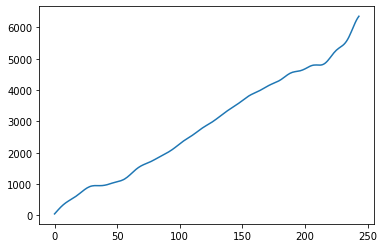

In [16]:
vals_r = np.mean(ac3_r[:244, 99:102], axis=1)
pl.plot(vals_r)


### Green channel, averaging 3 pixels

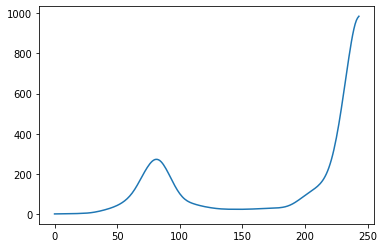

In [17]:
vals_g = np.mean(ac3_g[:244, 99:102], axis=1)
pl.plot(vals_g)

### Red channel, averaging 9 pixels

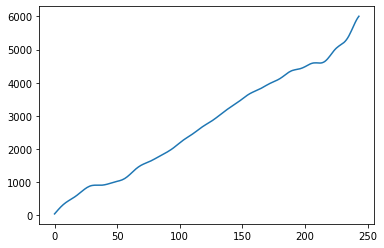

In [18]:
vals_r = np.mean(ac3_r[:244, 91:110], axis=1)
pl.plot(vals_r)

### Green channel, averaging 9 pixels

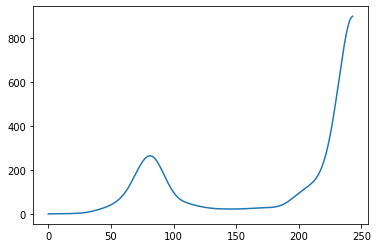

In [19]:
vals_g = np.mean(ac3_g[:244, 91:110], axis=1)
pl.plot(vals_g)

### Thoughts: 
This doesn't seem to make any difference vs. just taking the central value. Of course, this may not be the case for other images.